In [42]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import tree

#load data

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target

boston_df['Price']=boston.target
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
print (newX[0:3]) # check 
newY=boston_df['Price']
#print type(newY)# pandas core frame

#split
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

print (len(X_test))
print( len(y_test))

#apply linear regression
print(boston_df)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152
152
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [59]:
clf =tree.DecisionTreeClassifier(criterion='entropy',random_state=200)
clf=clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)  #预测的准确度
score   #结果0.944


ValueError: Number of labels=124 does not match number of samples=354

In [ ]:
import graphviz
dot_data=tree.export_graphviz(clf
                             ,out_file=None
                              ,feature_names=boston.feature_names
                              
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

# DecisionTreeClassifier

In [34]:
from sklearn import tree
from sklearn.datasets import load_wine  #自带的红酒数据集
from sklearn.model_selection import train_test_split


#数据探索
wine=load_wine()
wine.data
wine.data.shape
print(dir(wine))
print(wine.feature_names)
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
print(pd.DataFrame(wine.data,columns=wine.feature_names))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13

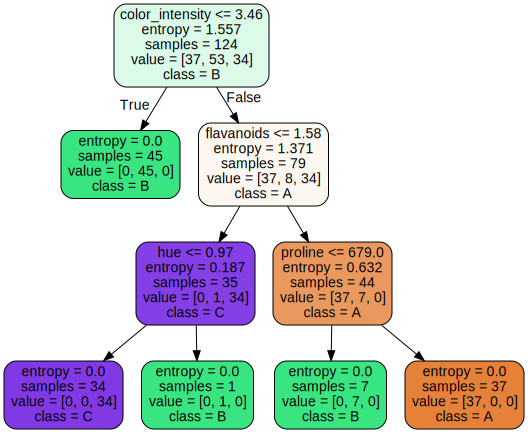

In [70]:
#划分训练集和测试集，进行建模
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3)
x_train.shape
x_test.shape
#建立模型
clf =tree.DecisionTreeClassifier(criterion='entropy',random_state=200)

clf=clf.fit(x_train,y_train)
score=clf.score(x_test,y_test)  #预测的准确度
score   #结果0.944

import graphviz
dot_data=tree.export_graphviz(clf
                             ,out_file=None
                              ,feature_names=wine.feature_names
                              ,class_names=['A','B','C']
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr=lr.fit(x_train,y_train)
score2=lr.score(x_test,y_test)  #预测的准确度
score2   #结果0.944

0.9134016722478521

0.9444444444444444


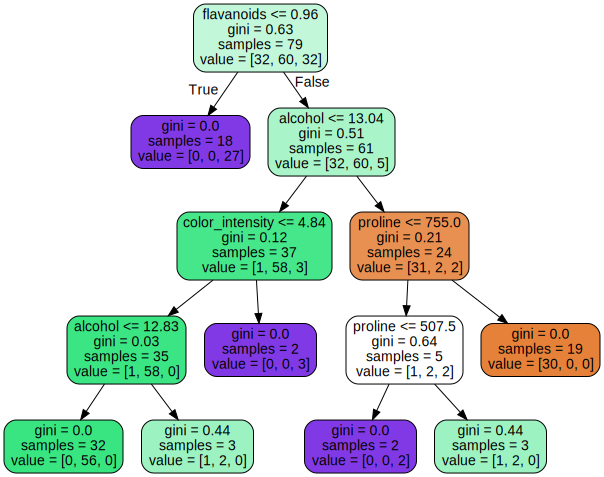

In [80]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0,n_estimators=10)
clf=clf.fit(x_train,y_train)
score2=clf.score(x_test,y_test) 
print(score2)

estimator = clf.estimators_[1]

# Export as dot file
dot_data=tree.export_graphviz(estimator, 
                              feature_names=wine.feature_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
graph=graphviz.Source(dot_data)
graph

# LinearRegression

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152
152
linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576851
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123906
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921933


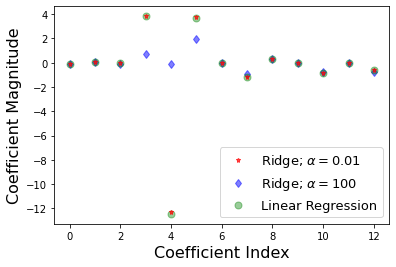

In [21]:
import pandas as pd
from sklearn.datasets import load_boston

#load data

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target

boston_df['Price']=boston.target
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
print (newX[0:3]) # check 
newY=boston_df['Price']
#print type(newY)# pandas core frame

#split
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

print (len(X_test))
print( len(y_test))

#apply linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# apply ridge
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

# graph

import matplotlib.pyplot as plt

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

# LinearRegression

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57  

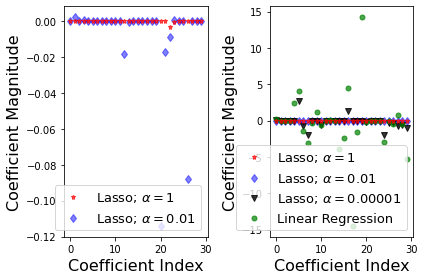

In [22]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print (cancer.keys())
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print (cancer_df.head(3))
X = cancer.data
Y = cancer.target

#splitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)



#apply linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)


#apply lasso

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)


lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)



# graph

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

 

# DecisionTreeRegressor

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values


print(dataset)
print(y)


    1     3026.385
0   1  3554.230769
1   1  2902.384615
2   1  3348.076923
3   2  3068.538462
4   2  4357.076923
5   2  4626.923077
6   2  4188.076923
7   2  4957.307692
8   2  4399.153846
9   3  4862.923077
10  3  4291.846154
11  3  4381.307692
12  3  4390.846154
13  4  4700.846154
14  4  5226.000000
15  4  5079.153846
16  4  6391.384615
17  5  6258.692308
18  5  7226.153846
19  5  7056.769231
20  5  7559.461538
21  6  7792.461538
22  6  8754.769231
23  6  8417.769231
24  7  8121.692308
25  7  8997.615385
26  8  8664.230769
27  8  9414.692308
28  9  9374.769231
[3554.230769 2902.384615 3348.076923 3068.538462 4357.076923 4626.923077
 4188.076923 4957.307692 4399.153846 4862.923077 4291.846154 4381.307692
 4390.846154 4700.846154 5226.       5079.153846 6391.384615 6258.692308
 7226.153846 7056.769231 7559.461538 7792.461538 8754.769231 8417.769231
 8121.692308 8997.615385 8664.230769 9414.692308 9374.769231]


[7025.26923075]


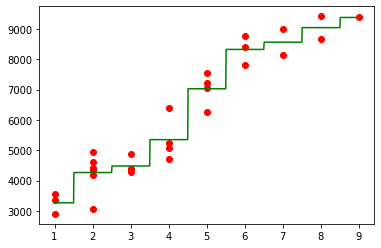

In [53]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

# Predicting a new result
y_pred = regressor.predict(np.array(4.8).reshape(-1,1))
print(y_pred )


X2 = np.arange(min(X), max(X), 0.01)
X2 = X2.reshape((len(X2), 1))
plt.scatter(X, y, color = 'r')
plt.plot(X2, regressor.predict(X2), color = 'g')
plt.show()

In [52]:
np.array(4.8).reshape(-1,1)

array([[4.8]])

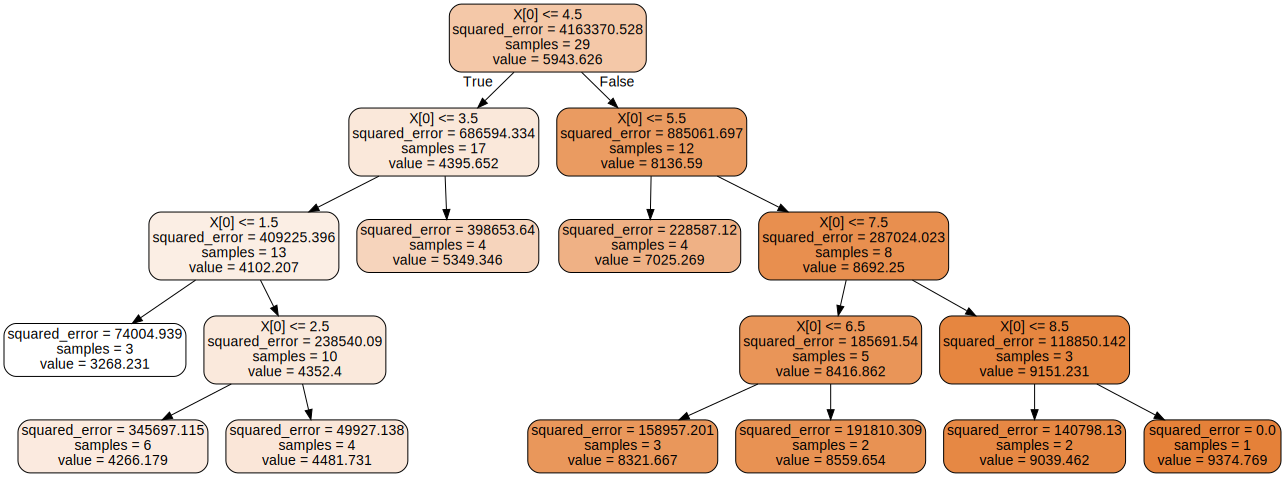

In [48]:
import graphviz
dot_data=tree.export_graphviz(regressor
                             ,out_file=None
                              ,filled=True
                              ,rounded=True
                             )
graph=graphviz.Source(dot_data)
graph

[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]
[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]
Predicted price:  8000



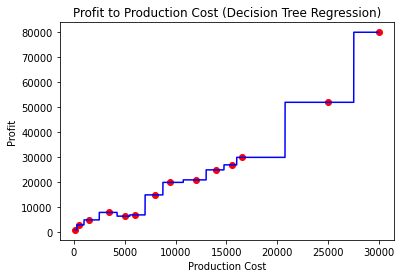

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 


dataset = np.array( 
        [['Asset Flip', 100, 1000], 
        ['Text Based', 500, 3000], 
        ['Visual Novel', 1500, 5000], 
        ['2D Pixel Art', 3500, 8000], 
        ['2D Vector Art', 5000, 6500], 
        ['Strategy', 6000, 7000], 
        ['First Person Shooter', 8000, 15000], 
        ['Simulator', 9500, 20000], 
        ['Racing', 12000, 21000], 
        ['RPG', 14000, 25000], 
        ['Sandbox', 15500, 27000], 
        ['Open-World', 16500, 30000], 
        ['MMOFPS', 25000, 52000], 
        ['MMORPG', 30000, 80000] ]) 

print(dataset) 
X = dataset[:, 1:2].astype(int) 
print(X) 
y = dataset[:, 2].astype(int) 
print(y) 

from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y) 
y_pred = regressor.predict(np.array(3750).reshape(1,-1)) 

print("Predicted price: % d\n"% y_pred) 

X_grid = np.arange(min(X), max(X), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1)) 

plt.scatter(X, y, color = 'red') 

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

plt.title('Profit to Production Cost (Decision Tree Regression)') 

plt.xlabel('Production Cost') 

plt.ylabel('Profit') 

plt.show() 


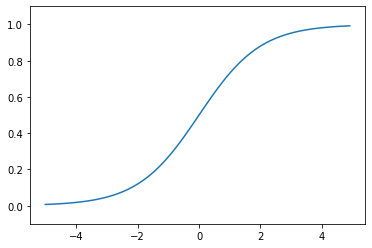

In [89]:
import matplotlib.pyplot as plt
import math
import numpy as np

def stable_sigmoid(x):

    return 1/(1+np.exp(-x))
x=np.arange(-5.0,5.0,0.1)
y=stable_sigmoid(x)
plt.ylim(-0.1,1.1)
plt.plot(x,y)
plt.show()

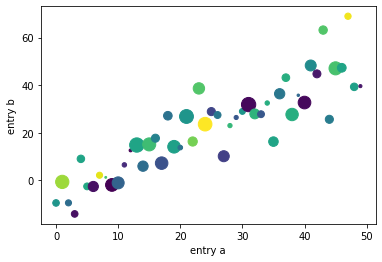

In [102]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


In [101]:
d=pd.DataFrame.from_dict(data)
d

,a,c,d,b
0,0,20,86.908278,-5.239798
1,1,29,29.148727,-6.130471
2,2,11,105.635135,5.522807
3,3,45,111.335055,6.442370
4,4,8,83.030763,0.934800
5,5,6,21.756418,10.923411
6,6,8,75.217092,25.311066
7,7,33,7.944801,-1.631417
8,8,48,82.145268,11.088472
9,9,4,22.467428,9.793091
